<a href="https://colab.research.google.com/github/Fsrkh/machine-learning-small-projects/blob/main/bank_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing and Understanding data

In [4]:
df = pd.read_csv('customer_bank_data.csv')
df.head()

,CUSTOMERID,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,DEFAULTED,ADDRESS
0,1,41,UNDER GRADUATE,6,19,0.124,1.073,0,NBA001
1,2,47,SCHOOL,26,100,4.582,8.218,0,NBA021
2,3,33,UNDER GRADUATE,10,57,6.111,5.802,1,NBA013
3,4,29,UNDER GRADUATE,4,19,0.681,0.516,0,NBA009
4,5,47,SCHOOL,31,253,9.308,8.908,0,NBA008


In [5]:
df = df.drop(['CUSTOMERID', 'DEFAULTED'], axis = 1)
df.head()

,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,ADDRESS
0,41,UNDER GRADUATE,6,19,0.124,1.073,NBA001
1,47,SCHOOL,26,100,4.582,8.218,NBA021
2,33,UNDER GRADUATE,10,57,6.111,5.802,NBA013
3,29,UNDER GRADUATE,4,19,0.681,0.516,NBA009
4,47,SCHOOL,31,253,9.308,8.908,NBA008


In [6]:
df.isnull().sum()

AGE              0
EDUCATION        0
YEARSEMPLOYED    0
INCOME           0
CARDDEBT         0
OTHERDEBT        0
ADDRESS          0
dtype: int64

no missing data :)))

In [7]:
df.nunique()

AGE               37
EDUCATION          5
YEARSEMPLOYED     33
INCOME           129
CARDDEBT         727
OTHERDEBT        788
ADDRESS           32
dtype: int64

In [8]:
df.dtypes

AGE                int64
EDUCATION         object
YEARSEMPLOYED      int64
INCOME             int64
CARDDEBT         float64
OTHERDEBT        float64
ADDRESS           object
dtype: object

In [9]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
EDUCATION : ['UNDER GRADUATE' 'SCHOOL' 'POST GRADUATE' 'DOCTRATE'
 'POST DOCTORAL RESEARCH']
ADDRESS : ['NBA001' 'NBA021' 'NBA013' 'NBA009' 'NBA008' 'NBA016' 'NBA006' 'NBA011'
 'NBA010' 'NBA003' 'NBA000' 'NBA019' 'NBA005' 'NBA004' 'NBA022' 'NBA018'
 'NBA002' 'NBA007' 'NBA026' 'NBA020' 'NBA012' 'NBA014' 'NBA024' 'NBA015'
 'NBA017' 'NBA023' 'NBA025' 'NBA027' 'NBA031' 'NBA030' 'NBA034' 'NBA029']


In [10]:
df.head()

,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,ADDRESS
0,41,UNDER GRADUATE,6,19,0.124,1.073,NBA001
1,47,SCHOOL,26,100,4.582,8.218,NBA021
2,33,UNDER GRADUATE,10,57,6.111,5.802,NBA013
3,29,UNDER GRADUATE,4,19,0.681,0.516,NBA009
4,47,SCHOOL,31,253,9.308,8.908,NBA008


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
enc= OneHotEncoder()

enc_data = pd.DataFrame(enc.fit_transform(df[['EDUCATION', 'ADDRESS']]).toarray())

df_dropped = df.drop(['EDUCATION', 'ADDRESS'], axis=1)

df_encoded = pd.concat([df_dropped, enc_data], axis=1)

df_encoded.head()

,AGE,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,0,1,2,3,4,...,27,28,29,30,31,32,33,34,35,36
0,41,6,19,0.124,1.073,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,26,100,4.582,8.218,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,10,57,6.111,5.802,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29,4,19,0.681,0.516,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,31,253,9.308,8.908,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.head()

,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,ADDRESS
0,41,UNDER GRADUATE,6,19,0.124,1.073,NBA001
1,47,SCHOOL,26,100,4.582,8.218,NBA021
2,33,UNDER GRADUATE,10,57,6.111,5.802,NBA013
3,29,UNDER GRADUATE,4,19,0.681,0.516,NBA009
4,47,SCHOOL,31,253,9.308,8.908,NBA008


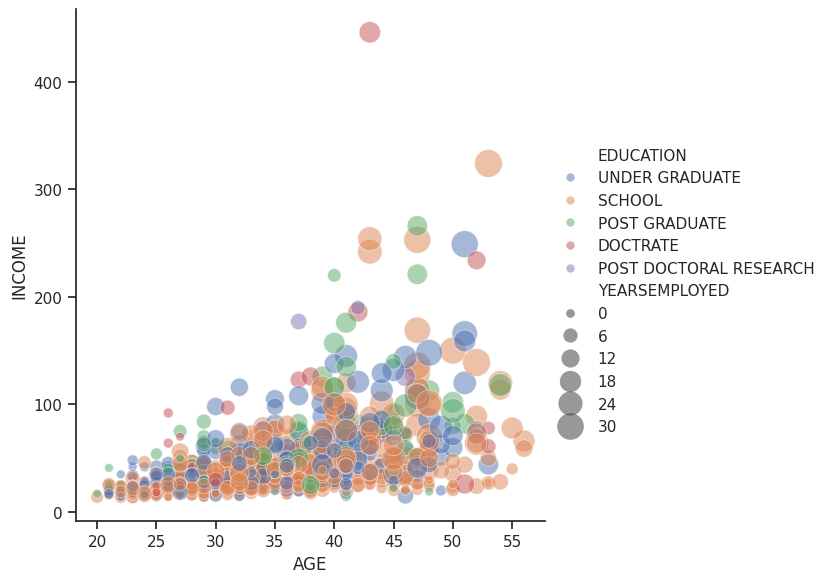

In [14]:
sns.set_theme(style = 'ticks')

sns.relplot(x= 'AGE', y = 'INCOME', hue = 'EDUCATION', size = 'YEARSEMPLOYED', sizes = (40, 400), alpha = 0.5, height=6, data = df)

<Axes: xlabel='count', ylabel='EDUCATION'>

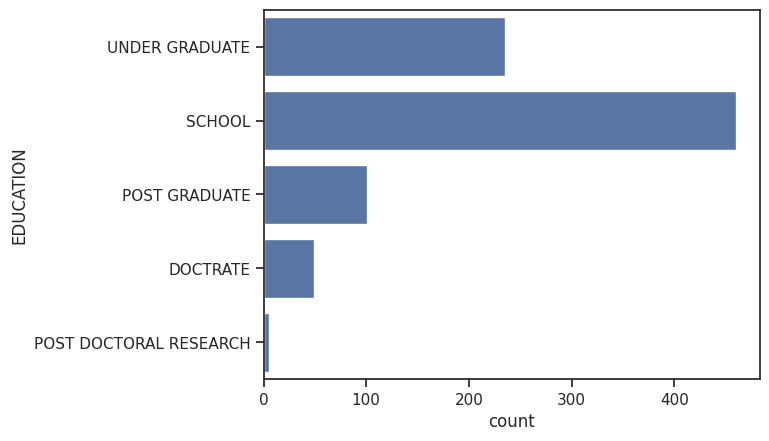

In [15]:
sns.countplot(df['EDUCATION'])

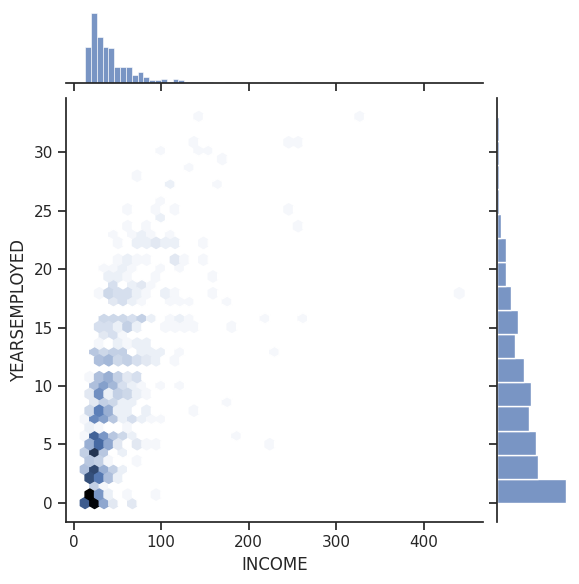

In [16]:
sns.jointplot(x='INCOME', y='YEARSEMPLOYED', data= df, kind='hex',
              gridsize=40)

<Axes: xlabel='EDUCATION', ylabel='INCOME'>

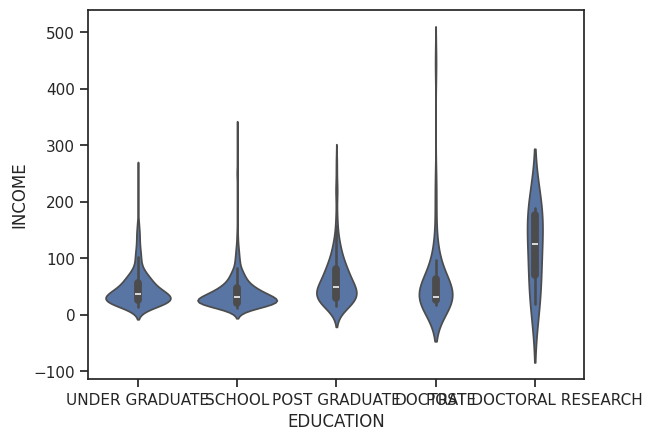

In [17]:
sns.violinplot(
    x='EDUCATION',
    y='INCOME',
    data=df
)

#**Modeling**

## k means

KNN is a simple and intuitive machine learning algorithm used for classification and regression tasks.
In KNN, the prediction for a new data point is made by considering the majority class (for classification) or the average value (for regression) among its k nearest neighbors in the feature space.
The value of k, the number of neighbors, is a hyperparameter that needs to be chosen by the user. It greatly influences the model's performance and generalization.

In [18]:
from sklearn.cluster import KMeans

In [19]:
df_encoded.dtypes
df_encoded.columns = df_encoded.columns.astype(str)

In [20]:
sse = []
k_range = range(1,11)

for k in k_range:
  print('-------- making the model with the k of: ', k,' ----------')
  kmeans = KMeans(n_clusters = k, random_state = 28)
  print('-------- fitting the model with the k of: ', k,' ----------')
  kmeans.fit(df_encoded)
  sse.append(kmeans.inertia_)
  print('-------- appending the model with the k of: ', k,' ----------')

-------- making the model with the k of:  1  ----------
-------- fitting the model with the k of:  1  ----------
-------- appending the model with the k of:  1  ----------
-------- making the model with the k of:  2  ----------
-------- fitting the model with the k of:  2  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  2  ----------
-------- making the model with the k of:  3  ----------
-------- fitting the model with the k of:  3  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  3  ----------
-------- making the model with the k of:  4  ----------
-------- fitting the model with the k of:  4  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  4  ----------
-------- making the model with the k of:  5  ----------
-------- fitting the model with the k of:  5  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  5  ----------
-------- making the model with the k of:  6  ----------
-------- fitting the model with the k of:  6  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  6  ----------
-------- making the model with the k of:  7  ----------
-------- fitting the model with the k of:  7  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  7  ----------
-------- making the model with the k of:  8  ----------
-------- fitting the model with the k of:  8  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  8  ----------
-------- making the model with the k of:  9  ----------
-------- fitting the model with the k of:  9  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  9  ----------
-------- making the model with the k of:  10  ----------
-------- fitting the model with the k of:  10  ----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-------- appending the model with the k of:  10  ----------


 using the elbow method, we will choose the optimal value of k



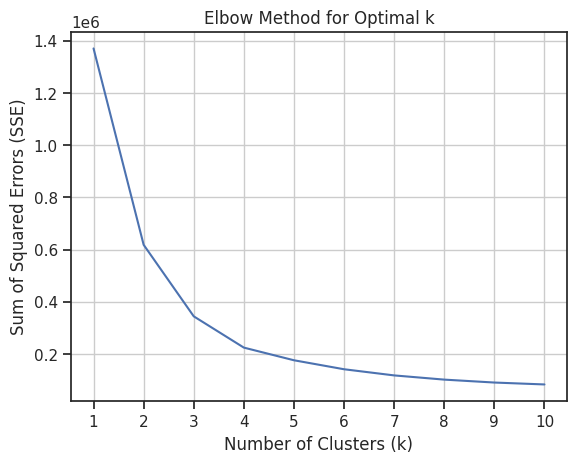

In [21]:
plt.plot(k_range, sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

As we can see in the plot when the k is 5, the graph moves almost parallel to the X-axi, so k = 5 could be our optimal value.

## DBSCAN


DBSCAN is a clustering algorithm used to group together data points that are closely packed in high-density regions.
Unlike K-means, DBSCAN does not require the number of clusters to be specified in advance and can find clusters of arbitrary shapes.
DBSCAN defines clusters as continuous regions of high density separated by regions of low density, allowing it to identify outliers as data points that do not belong to any cluster.
DBSCAN has two main parameters: epsilon (eps), which defines the radius within which to search for neighboring points, and min_samples, which sets the minimum number of points required to form a dense region.

In [31]:
from sklearn.cluster import DBSCAN

In [26]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [28]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_encoded)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(df_encoded, DBS_clustering.labels_))

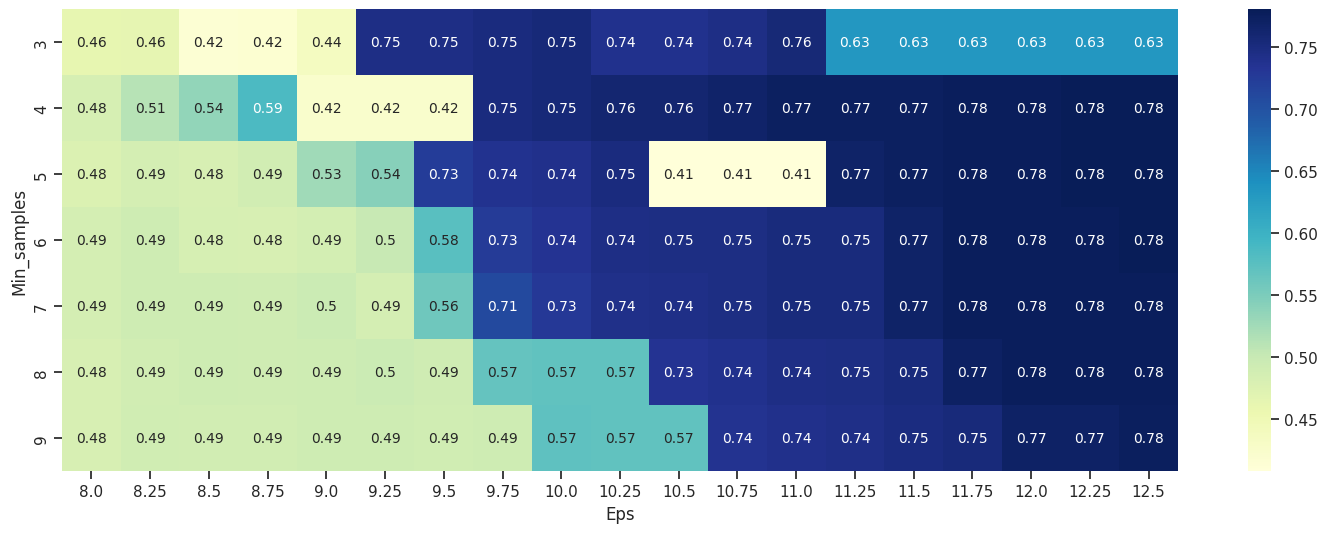

In [29]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Based on this heatmap (silhouette score ) we choose the min sample of 4 and eps of 11.5

## Birch

Birch makes summeries of data points into smaller, dense regions called clustering feature and then performs clustering on summeries it's more appropriate for larger data sets.

In [30]:
from sklearn.cluster import Birch

In [37]:
from itertools import product

threshold = np.arange(0.1 , 1, 0.1)
n_clusters = np.arange(3,10)
print(threshold)

Birch_params = list(product(threshold, n_clusters))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [38]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in Birch_params:
    Birch_clustering = Birch(threshold=p[0], n_clusters=p[1]).fit(df_encoded)
    no_of_clusters.append(len(np.unique(Birch_clustering.labels_)))
    sil_score.append(silhouette_score(df_encoded, Birch_clustering.labels_))

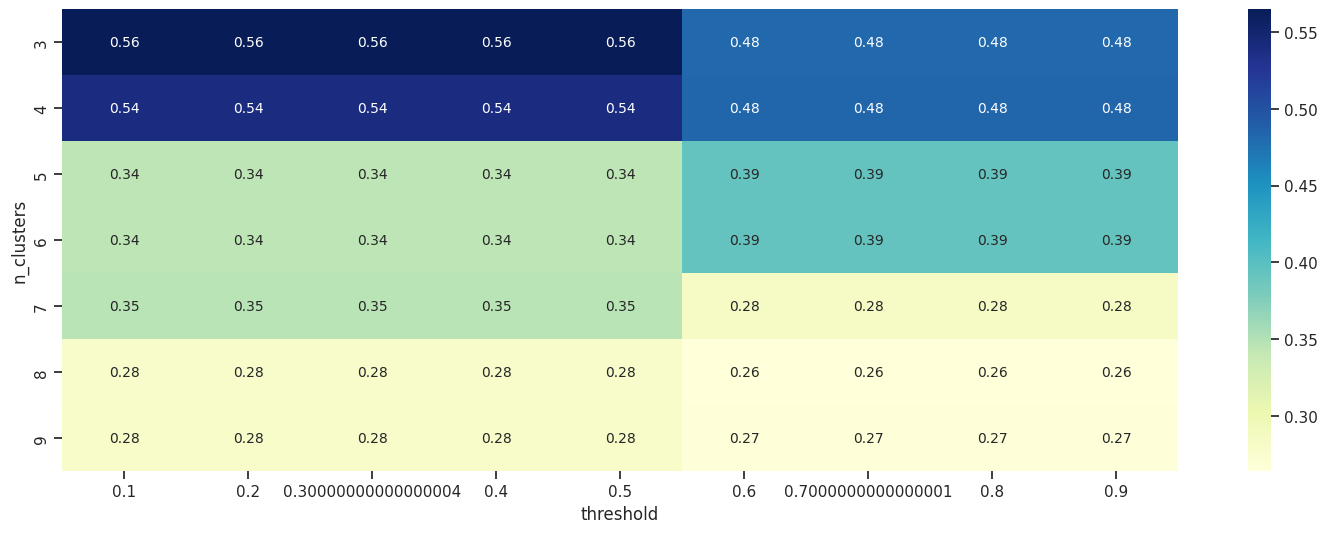

In [39]:
tmp = pd.DataFrame.from_records(Birch_params, columns =['threshold', 'n_clusters'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='n_clusters', columns='threshold')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

# Affinity Propagation

Each data point communicates with all of other data points to let each other know how similar they are and that starts to reveal the clusters in the data. As messages are sent between different data points, sets of data called examplers are found and they represent clusters.

In [40]:
from sklearn.cluster import AffinityPropagation

In [41]:
no_of_clusters = []
preferences = range(-20000,-5000,100)
af_sil_score = []

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(df_encoded)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(df_encoded, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

,preference,clusters,sil_score
31,-16900.0,5.0,0.590870
7,-19300.0,5.0,0.585529
24,-17600.0,6.0,0.521654
39,-16100.0,6.0,0.517424
75,-12500.0,6.0,0.514142


In [43]:
AF = AffinityPropagation(preference=-16900.0).fit(df_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [44]:
AF_clustered =df_encoded.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

In [45]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,2
1,1
2,1
3,1
4,8
...,...
381,4
382,2
383,1
